In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
dataset_split = pd.read_csv("DailyDelhiClimateTest.csv")

In [4]:
dataset_split.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          114 non-null    object 
 1   meantemp      114 non-null    float64
 2   humidity      114 non-null    float64
 3   wind_speed    114 non-null    float64
 4   meanpressure  114 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.6+ KB


In [5]:
dataset_split.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [7]:
dataset_split.shape

(114, 5)

In [8]:
X = dataset_split.iloc[:,:-1]
y = dataset_split.iloc[:,-1]

X_train, X_test, y_train, y_test, = train_test_split(X,y, test_size=0.2)

In [14]:
print("Dimensi X_train: ", X_train.shape)
print("Dimensi X_test: ", X_train.shape)
print("Dimensi y_train: ", y_train.shape)
print("Dimensi y_test: ", y_test.shape)

Dimensi X_train:  (91, 4)
Dimensi X_test:  (91, 4)
Dimensi y_train:  (91,)
Dimensi y_test:  (23,)


# Data Tranforming (Normalization)

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
min_max_scaler = MinMaxScaler()

In [23]:
x_scaled = min_max_scaler.fit_transform(
    dataset_split[['meantemp',
                   'humidity',
                   'wind_speed',
                   'meanpressure']]
)

In [76]:
data_normalization = pd.DataFrame(x_scaled)
data_normalization.head()

,0,1,2,3
0,0.209066,0.872396,0.075640,0.000000
1,0.319149,0.761651,0.084061,0.995298
2,0.260047,0.821416,0.146661,0.995356
3,0.327660,0.669797,0.176133,0.992624
4,0.314421,0.732480,0.106684,0.991206


In [80]:
np.std(x_scaled)

0.3180164324140021

In [81]:
np.mean(x_scaled)

0.5766140569570625

# Data Tranforming (Standarization)

In [67]:
np.std(dataset_split)

meantemp         6.332115
humidity        18.984267
wind_speed       3.572278
meanpressure    89.081395
dtype: float64

In [68]:
from sklearn.preprocessing import StandardScaler

In [65]:
ss = StandardScaler()

In [69]:
x_scaled2 = ss.fit_transform(
    dataset_split[['meantemp',
                   'humidity',
                   'wind_speed',
                   'meanpressure']]
)

In [72]:
data_standarization = pd.DataFrame(x_scaled2)
data_standarization.head()

,0,1,2,3
0,-0.915971,1.559776,-1.511765,-10.608670
1,-0.507426,1.104275,-1.469505,0.159884
2,-0.726766,1.350093,-1.155357,0.160508
3,-0.475841,0.726477,-1.007459,0.130947
4,-0.524973,0.984293,-1.355976,0.115605


In [74]:
np.std(x_scaled2)

1.0

In [79]:
np.mean(x_scaled2)

2.1425356615573195e-17

# Data Visual Dataset

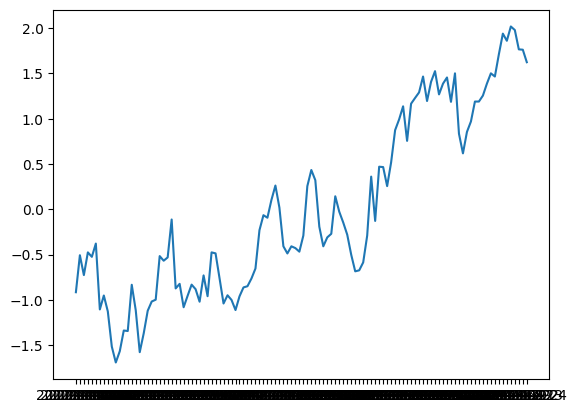

<Figure size 500x500 with 0 Axes>

In [96]:
# plt.plot(dataset_split.date, dataset_split.meantemp)
# plt.plot(dataset_split.date, data_normalization[1])
plt.plot(dataset_split.date, data_standarization[0])
plt.figure(figsize=(5,5))
plt.show()

# Data Cleaning

In [97]:
df = pd.read_csv("DailyDelhiClimateTestRusak.csv")

In [99]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [101]:
df[9:21]

,date,meantemp,humidity,wind_speed,meanpressure
9,2017-01-10,12.111111,71.944444,9.361111,1016.888889
10,2017-01-11,11.000000,72.111111,9.772222,1016.777778
11,2017-01-12,11.789474,NaN,NaN,NaN
12,2017-01-13,13.235294,NaN,NaN,NaN
13,2017-01-14,13.200000,NaN,NaN,NaN
14,2017-01-15,16.434783,NaN,NaN,NaN
15,2017-01-16,14.650000,NaN,NaN,NaN
16,2017-01-17,11.722222,NaN,NaN,NaN
17,2017-01-18,13.041667,NaN,NaN,NaN
18,2017-01-19,14.619048,75.142857,10.338095,1022.809524


## Menangani Nilai NULL

In [103]:
df.isna().sum()

date             0
meantemp         9
humidity        16
wind_speed      16
meanpressure     7
dtype: int64

In [106]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean")

In [107]:
df["meantemp"] = imputer.fit_transform(df[["meantemp"]])

In [108]:
df.isna().sum()

date             0
meantemp         0
humidity        16
wind_speed      16
meanpressure     7
dtype: int64

In [110]:
df[93:102]

,date,meantemp,humidity,wind_speed,meanpressure
93,2017-04-04,21.001775,NaN,NaN,1007.200000
94,2017-04-05,21.001775,NaN,NaN,1005.000000
95,2017-04-06,21.001775,NaN,NaN,1002.888889
96,2017-04-07,21.001775,NaN,NaN,1007.375000
97,2017-04-08,21.001775,NaN,NaN,1010.375000
98,2017-04-09,21.001775,NaN,NaN,1010.625000
99,2017-04-10,21.001775,NaN,NaN,1008.571429
100,2017-04-11,29.250000,17.75,15.5125,1006.250000
101,2017-04-12,29.250000,26.00,9.4875,1005.875000


# Impute menggunakan fungsi dari pandas

In [113]:
df.isna().sum()

date             0
meantemp         0
humidity        16
wind_speed      16
meanpressure     7
dtype: int64

In [114]:
df["humidity"]=df["humidity"].fillna(df["humidity"].mean())

In [121]:
df.fillna(df.mean(numeric_only=None))

C:\Users\Last Man Standing\AppData\Local\Temp\ipykernel_9588\4179414259.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(numeric_only=None))


,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333
...,...,...,...,...,...
109,2017-04-14,30.500000,37.625000,1.387500,1004.625000
110,2017-04-15,31.222222,30.444444,5.966667,1002.444444
111,2017-04-22,32.900000,40.900000,8.890000,1001.600000
112,2017-04-23,32.875000,27.500000,9.962500,1002.125000


In [123]:
df.isna().sum()

date             0
meantemp         0
humidity         0
wind_speed      16
meanpressure     7
dtype: int64

# Menagani nilai duplikat

In [126]:
df[df.duplicated()]

,date,meantemp,humidity,wind_speed,meanpressure
108,2017-04-13,29.666667,29.111111,4.944444,1006.777778
109,2017-04-14,30.500000,37.625000,1.387500,1004.625000
110,2017-04-15,31.222222,30.444444,5.966667,1002.444444


In [127]:
df.duplicated().sum()

3

In [129]:
df.drop_duplicates(inplace=True)

In [130]:
df[df.duplicated()]

,date,meantemp,humidity,wind_speed,meanpressure


In [131]:
df.duplicated().sum()

0

# Encoding

## Ordinal Encoding

In [132]:
from sklearn.preprocessing import OrdinalEncoder

In [133]:
# Buat DataFrame baru (Custom)
nama = ["Kania", "Chima","Herni","Azizah","Awan",
        "Fikri","Ananta","Bayu","Ilham","Rezky"]
hobi = ["Tidur","Tidur","Tidur","Membaca","Merokok",
        "Merokok","Merokok","Membaca","Posttest","Posttest"]
# Buat DataFrame Baru (Custom)
df = pd.DataFrame({"nama":nama, "hobi":hobi})

In [134]:
df.head(10)

,nama,hobi
0,Kania,Tidur
1,Chima,Tidur
2,Herni,Tidur
3,Azizah,Membaca
4,Awan,Merokok
5,Fikri,Merokok
6,Ananta,Merokok
7,Bayu,Membaca
8,Ilham,Posttest
9,Rezky,Posttest


In [137]:
encoder = OrdinalEncoder()
df["hobi_encoded"]=encoder.fit_transform(df[["hobi"]])
df.head(5)

,nama,hobi,hobi_encoded
0,Kania,Tidur,3.0
1,Chima,Tidur,3.0
2,Herni,Tidur,3.0
3,Azizah,Membaca,0.0
4,Awan,Merokok,1.0


## One-Hot Encoding

In [138]:
from sklearn.preprocessing import OneHotEncoder

In [139]:
onehotencoder = OneHotEncoder(sparse=False)

In [140]:
hobi_encode2 = onehotencoder.fit_transform(df[["hobi"]])

In [146]:
df2 = pd.DataFrame(hobi_encode2)
df = df.join(df2)
df.head()

,nama,hobi,hobi_encoded,0,1,2,3
0,Kania,Tidur,3.0,0.0,0.0,0.0,1.0
1,Chima,Tidur,3.0,0.0,0.0,0.0,1.0
2,Herni,Tidur,3.0,0.0,0.0,0.0,1.0
3,Azizah,Membaca,0.0,1.0,0.0,0.0,0.0
4,Awan,Merokok,1.0,0.0,1.0,0.0,0.0


In [147]:
df.head(10)

,nama,hobi,hobi_encoded,0,1,2,3
0,Kania,Tidur,3.0,0.0,0.0,0.0,1.0
1,Chima,Tidur,3.0,0.0,0.0,0.0,1.0
2,Herni,Tidur,3.0,0.0,0.0,0.0,1.0
3,Azizah,Membaca,0.0,1.0,0.0,0.0,0.0
4,Awan,Merokok,1.0,0.0,1.0,0.0,0.0
5,Fikri,Merokok,1.0,0.0,1.0,0.0,0.0
6,Ananta,Merokok,1.0,0.0,1.0,0.0,0.0
7,Bayu,Membaca,0.0,1.0,0.0,0.0,0.0
8,Ilham,Posttest,2.0,0.0,0.0,1.0,0.0
9,Rezky,Posttest,2.0,0.0,0.0,1.0,0.0
